In [ ]:
# Importing required libraries 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# Generating synthetic dataset with 3 centers (clusters)
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [ ]:
# shape of the generated data
X.shape

(1000, 2)

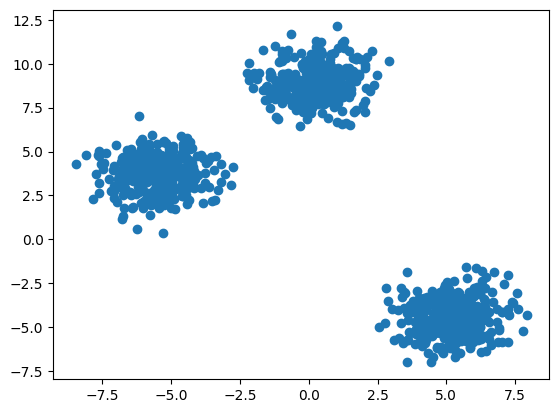

In [ ]:
# Visualizing the generated data points
plt.scatter(X[:,0],X[:,1])

In [ ]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Import KMeans clustering algorithm
from sklearn.cluster import KMeans

In [ ]:

# Calculate WCSS (within-cluster sum of squares) for different k values
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [ ]:
# WCSS values for each k
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1183.8605777252803,
 1049.116696515303,
 924.4695272457004,
 754.5826899382745,
 737.0700752223945,
 579.940189646188,
 533.2805651662811]

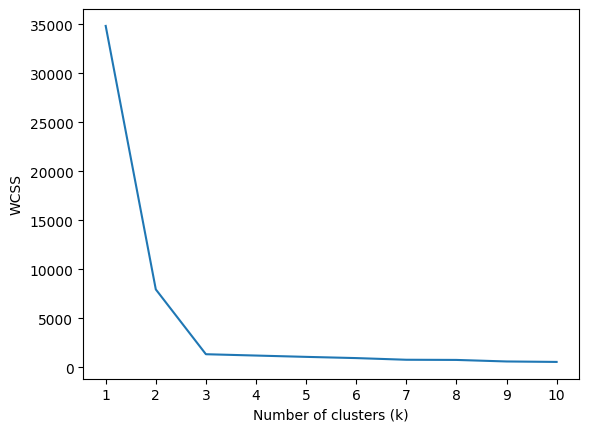

In [ ]:
# Plotting the elbow curve to find optimal k
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Fit KMeans with the chosen number of clusters (k=3)
kmeans=KMeans(n_clusters=3,init="k-means++")

In [ ]:
# Predicting cluster labels for training data
y_labels=kmeans.fit_predict(X_train)

In [ ]:
# Predicting cluster labels for test data
y_test_labels=kmeans.predict(X_test)

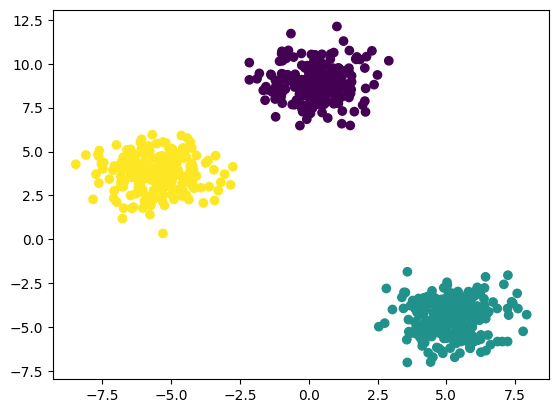

In [ ]:
# Visualizing clusters for training data
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

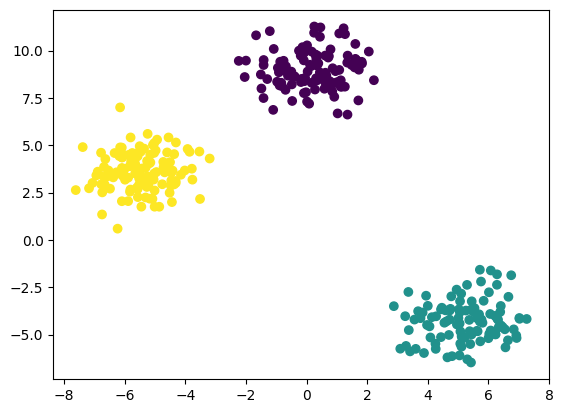

In [ ]:
# Visualizing clusters for test data
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [ ]:

# Installing kneed library for automatic elbow detection
!pip install kneed

In [ ]:
# Import KneeLocator 
from kneed import KneeLocator

In [ ]:
# Finding the elbow point automatically
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [ ]:
# Import silhouette_score
from sklearn.metrics import silhouette_score


In [ ]:
# Calculating silhouette coefficients for different k values
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
# silhouette coefficients for each k
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6452225311026528,
 0.48196009682399193,
 0.3363323500678605,
 0.32809891061640784,
 0.34086478237737367,
 0.3177640990508051,
 0.33526788632095283]

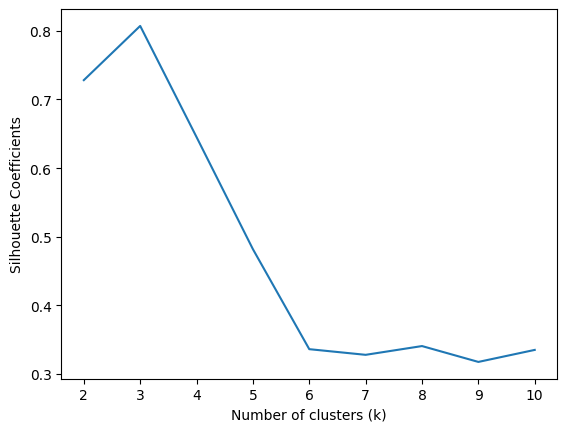

In [ ]:
# Plotting silhouette coefficients
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Coefficients")
plt.show()